# Churn Prediction

In [29]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [1]:
# prompt: mount drive and read_csv "Telco-Customer-Churn.csv" in the MLMarch folder
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/MLMarch/Telco-Customer-Churn.csv')
data.head()

Mounted at /content/drive


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [23]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [27]:
np.unique(data['Churn'], return_counts = True)

(array(['No', 'Yes'], dtype=object), array([5163, 1869]))

In [2]:
data['tenure'].max()

72

In [3]:
def convert(x):
    if x<=12:
        return 0
    elif x <= 24:
        return 1
    elif x<=36:
        return 2
    elif x<=48:
        return 3
    elif x<=60:
        return 4
    elif x<=72:
        return 5
    else:
        return 6
data['tenure'] = data['tenure'].apply(convert) # Or apply StandardScaler.
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7027,6840-RESVB,Male,0,Yes,Yes,1,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,5,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7031,3186-AJIEK,Male,0,No,No,5,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [4]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [5]:
X = data.drop(['customerID', 'Churn'], axis=1)
y = data['Churn']
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


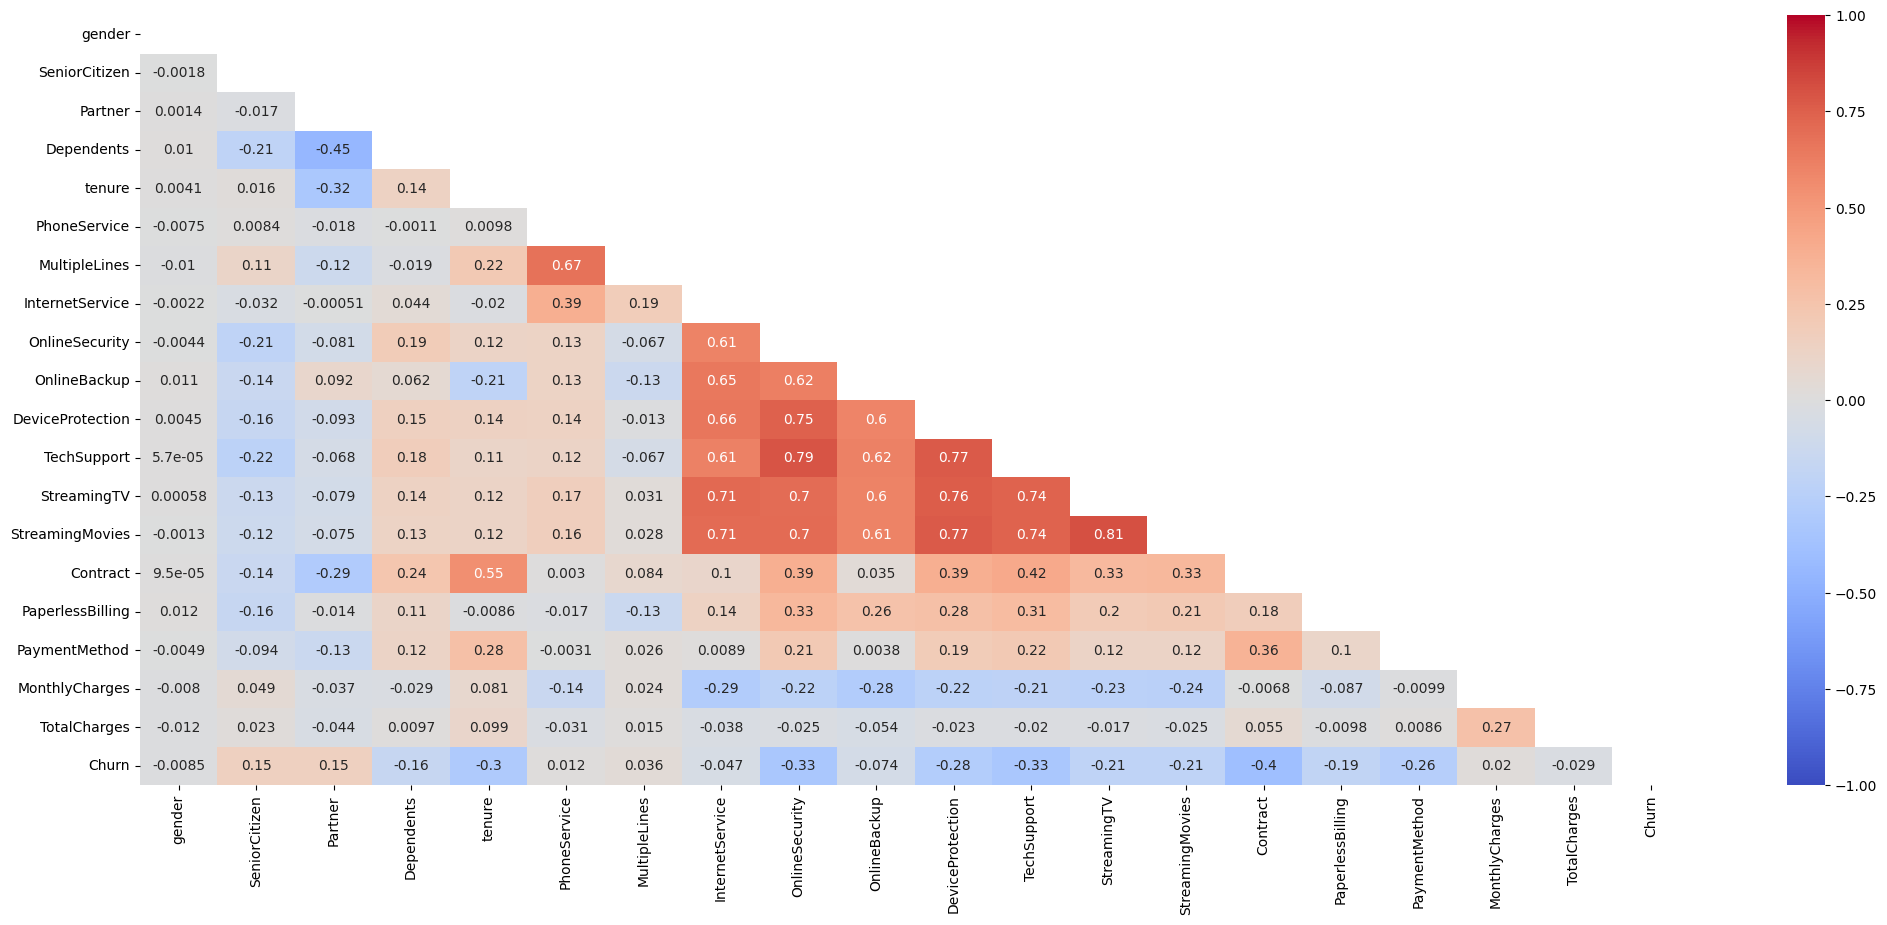

In [105]:
plt.figure(figsize=(25, 10))

corr = data.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

## **Without Undersampling**

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
clm = ColumnTransformer(transformers = [('std', StandardScaler(), [17, 18]), # col nos. to apply standard scaler
                                        ('one', OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'),
                                         [0, 2,3,5,6,7,8,9,10,11,12,13,14,15,16])],
                                           remainder = 'passthrough')

from sklearn.decomposition import PCA

pca = PCA(n_components = 15)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

voting = VotingClassifier(
    estimators = [('knn', KNeighborsClassifier()),
                  ('svc', SVC(probability = True)),
                  ('rf', RandomForestClassifier())],
    voting='soft'
) #Bagging
from sklearn.ensemble import GradientBoostingClassifier
grb = GradientBoostingClassifier()

# Stacking
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(
    estimators = [('voting', voting), ('grb', grb)],
    final_estimator = LogisticRegression(penalty = 'l2', solver = 'saga'))

In [9]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(
    [('step1', clm),
    ('step2', pca),
    ('step3', stack)]
)


In [10]:
param_grid = {
    'step3__voting__knn__n_neighbors': [5, 11, 15],
    "step3__voting__svc__C": [0.1,0.4,1],
    "step3__voting__svc__kernel": ['poly', 'rbf'],
    "step3__voting__svc__degree": [2, 3],
    "step3__voting__rf__n_estimators": [64, 128],
    "step3__voting__rf__max_depth": [None, 8, 12],
    "step3__voting__rf__min_samples_split": [15, 20, 30],
    "step3__grb__learning_rate": [0.2, 0.4, 0.6],
    "step3__grb__max_features": [8, 12],
    "step3__grb__n_estimators": [128, 256],
    "step3__grb__min_samples_split": [15, 25, 30],
    "step3__grb__max_depth": [None, 7, 10]
}

from sklearn.model_selection import RandomizedSearchCV

search = RandomizedSearchCV(pipe, param_grid, scoring='accuracy', n_iter=2)
search.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('step1',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('std',
                                                                               StandardScaler(),
                                                                               [17,
                                                                                18]),
                                                                              ('one',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse_output=False),
                                                                               [0,
                                                                                2,
                                                                                3,
                                                                                5,
                                                                                6,
                                                                                7,
                                                                                8,
                                                                                9,
                                                                                10,
                                                                                11,
                                                                                12,
                                                                                13,
                                                                                14,
                                                                                15,
                                                                                16])])),
                                             ('step2', PCA(n_components=15)),
                                             ('step3',
                                              StackingClassifier(estimators=[('voting',
                                                                              VotingClassifier(...
                                        'step3__grb__n_estimators': [128, 256],
                                        'step3__voting__knn__n_neighbors': [5,
                                                                            11,
                                                                            15],
                                        'step3__voting__rf__max_depth': [None,
                                                                         8,
                                                                         12],
                                        'step3__voting__rf__min_samples_split': [15,
                                                                                 20,
                                                                                 30],
                                        'step3__voting__rf__n_estimators': [64,
                                                                            128],
                                        'step3__voting__svc__C': [0.1, 0.4, 1],
                                        'step3__voting__svc__degree': [2, 3],
                                        'step3__voting__svc__kernel': ['poly',
                                                                       'rbf']},
                   scoring='accuracy')

In [14]:
y_pred= search.predict(X_test)

In [15]:
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.82      0.91      0.86      1033
         Yes       0.65      0.45      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407



In [16]:
print(search.score(X_test,y_test))

0.7882018479033405


In [33]:
# Data preprocessing
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [34]:
data = data.apply(lambda x: object_to_int(x))
data.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,2,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,0,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,3,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [36]:
data.drop(columns = ['customerID'], inplace = True)

In [42]:
num_cols = ['MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()

# Fit and transform the selected columns
data[num_cols] = scaler.fit_transform(data[num_cols])
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,-1.161694,-0.994194,0
1,1,0,0,0,2,1,0,0,2,0,2,0,0,0,1,0,3,-0.260878,-0.173740,0
2,1,0,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,-0.363923,-0.959649,1
3,1,0,0,0,3,0,1,0,2,0,2,2,0,0,1,0,0,-0.747850,-0.195248,0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,0.196178,-0.940457,1


In [43]:
data.corr()['Churn'].sort_values()

Contract           -0.396150
tenure             -0.340311
OnlineSecurity     -0.289050
TechSupport        -0.282232
TotalCharges       -0.199484
OnlineBackup       -0.195290
DeviceProtection   -0.177883
Dependents         -0.163128
Partner            -0.149982
InternetService    -0.047097
StreamingMovies    -0.038802
StreamingTV        -0.036303
gender             -0.008545
PhoneService        0.011691
MultipleLines       0.038043
PaymentMethod       0.107852
SeniorCitizen       0.150541
PaperlessBilling    0.191454
MonthlyCharges      0.192858
Churn               1.000000
Name: Churn, dtype: float64

In [44]:
X = data.drop(columns = ['Churn'])
y = data['Churn'].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 42)

Random Forest

In [47]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.795734597156398


In [48]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1549
           1       0.67      0.46      0.54       561

    accuracy                           0.80      2110
   macro avg       0.75      0.69      0.71      2110
weighted avg       0.78      0.80      0.78      2110



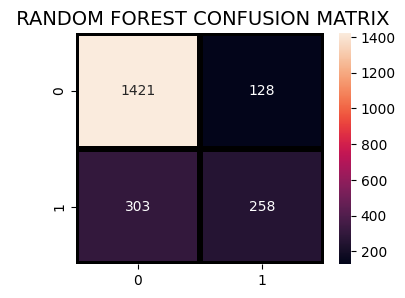

In [49]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

Logistic Regression

In [51]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7938388625592417


In [52]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.64      0.52      0.57       561

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110



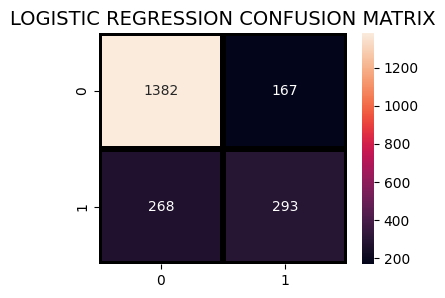

In [53]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

SVC

In [63]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
svc_preds = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7981042654028436


In [64]:
print(classification_report(y_test, svc_preds))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1549
           1       0.69      0.44      0.54       561

    accuracy                           0.80      2110
   macro avg       0.75      0.68      0.70      2110
weighted avg       0.79      0.80      0.78      2110



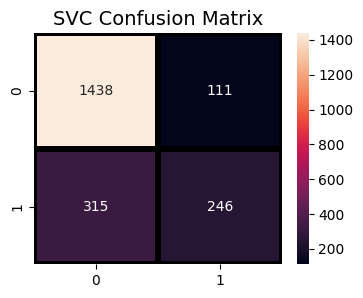

In [65]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, svc_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("SVC Confusion Matrix",fontsize=14)
plt.show()

AdaBoost Classifier

In [54]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.795734597156398

In [55]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



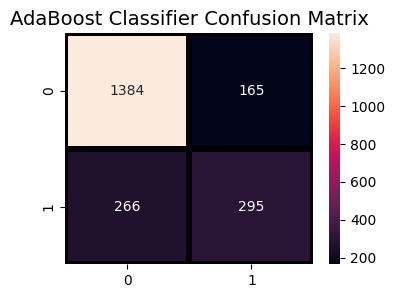

In [56]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

Gradient Boosting Classifier

In [57]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.804739336492891


In [58]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1549
           1       0.68      0.51      0.58       561

    accuracy                           0.80      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.79      0.80      0.80      2110



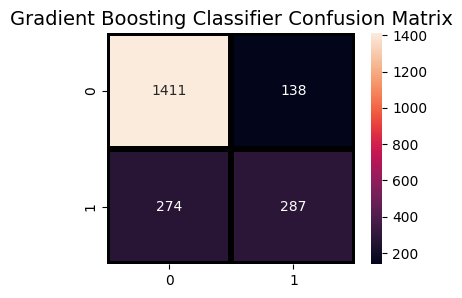

In [59]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

**Voting Classifier (Soft)**

In [60]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.8042654028436019


In [61]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1549
           1       0.67      0.51      0.58       561

    accuracy                           0.80      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110



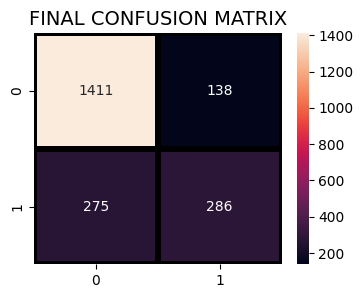

In [62]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

## **Random Undersampling** (to remove bias)

In [83]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,-1.161694,-0.994194
1,1,0,0,0,2,1,0,0,2,0,2,0,0,0,1,0,3,-0.260878,-0.173740
2,1,0,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,-0.363923,-0.959649
3,1,0,0,0,3,0,1,0,2,0,2,2,0,0,1,0,0,-0.747850,-0.195248
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,0.196178,-0.940457


In [89]:
np.unique(y, return_counts = True)

(array([0, 1]), array([5163, 1869]))

In [84]:
from imblearn.under_sampling import RandomUnderSampler

# Assuming X_train and y_train are your training data and labels
rus = RandomUnderSampler(sampling_strategy='majority')
X_resample, y_resample = rus.fit_resample(X, y)

In [90]:
np.unique(y_resample, return_counts = True)

(array([0, 1]), array([1869, 1869]))

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size = 0.10, random_state = 42)

AdaBoost Classifier

In [93]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.7887700534759359

In [94]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

           0       0.86      0.72      0.78       200
           1       0.73      0.87      0.79       174

    accuracy                           0.79       374
   macro avg       0.80      0.79      0.79       374
weighted avg       0.80      0.79      0.79       374



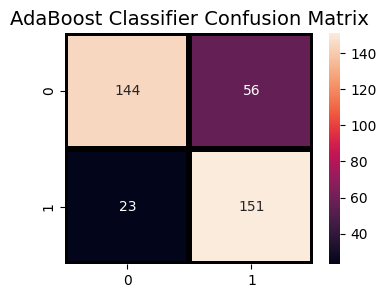

In [95]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

Logistic Regression

In [96]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7807486631016043


In [97]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.71      0.78       200
           1       0.72      0.86      0.78       174

    accuracy                           0.78       374
   macro avg       0.79      0.79      0.78       374
weighted avg       0.79      0.78      0.78       374



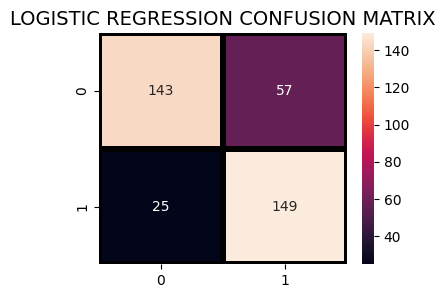

In [98]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

Gradient Boosting Classifier

In [99]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.7914438502673797


In [100]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       200
           1       0.74      0.84      0.79       174

    accuracy                           0.79       374
   macro avg       0.79      0.79      0.79       374
weighted avg       0.80      0.79      0.79       374



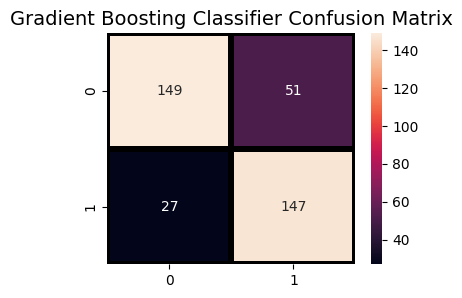

In [101]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

**Voting Classifier (Soft)**

In [102]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.7941176470588235


In [103]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       200
           1       0.74      0.85      0.79       174

    accuracy                           0.79       374
   macro avg       0.80      0.80      0.79       374
weighted avg       0.80      0.79      0.79       374



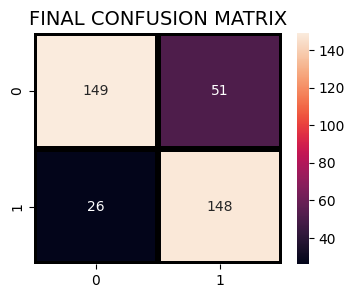

In [104]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

In [106]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
clm = ColumnTransformer(transformers = [('std', StandardScaler(), [17, 18]), # col nos. to apply standard scaler
                                        ('one', OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'),
                                         [0, 2,3,5,6,7,8,9,10,11,12,13,14,15,16])],
                                           remainder = 'passthrough')

from sklearn.decomposition import PCA

pca = PCA(n_components = 15)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

voting = VotingClassifier(
    estimators = [('knn', KNeighborsClassifier()),
                  ('svc', SVC(probability = True)),
                  ('rf', RandomForestClassifier())],
    voting='soft'
) #Bagging
from sklearn.ensemble import GradientBoostingClassifier
grb = GradientBoostingClassifier()

# Stacking
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(
    estimators = [('voting', voting), ('grb', grb)],
    final_estimator = LogisticRegression(penalty = 'l2', solver = 'saga'))

In [107]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(
    [('step1', clm),
    ('step2', pca),
    ('step3', stack)]
)


In [108]:
param_grid = {
    'step3__voting__knn__n_neighbors': [5, 11, 15],
    "step3__voting__svc__C": [0.1,0.4,1],
    "step3__voting__svc__kernel": ['poly', 'rbf'],
    "step3__voting__svc__degree": [2, 3],
    "step3__voting__rf__n_estimators": [64, 128],
    "step3__voting__rf__max_depth": [None, 8, 12],
    "step3__voting__rf__min_samples_split": [15, 20, 30],
    "step3__grb__learning_rate": [0.2, 0.4, 0.6],
    "step3__grb__max_features": [8, 12],
    "step3__grb__n_estimators": [128, 256],
    "step3__grb__min_samples_split": [15, 25, 30],
    "step3__grb__max_depth": [None, 7, 10]
}

from sklearn.model_selection import RandomizedSearchCV

search = RandomizedSearchCV(pipe, param_grid, scoring='accuracy', n_iter=2)
search.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('step1',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('std',
                                                                               StandardScaler(),
                                                                               [17,
                                                                                18]),
                                                                              ('one',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse_output=False),
                                                                               [0,
                                                                                2,
                                                                                3,
                                                                                5,
                                                                                6,
                                                                                7,
                                                                                8,
                                                                                9,
                                                                                10,
                                                                                11,
                                                                                12,
                                                                                13,
                                                                                14,
                                                                                15,
                                                                                16])])),
                                             ('step2', PCA(n_components=15)),
                                             ('step3',
                                              StackingClassifier(estimators=[('voting',
                                                                              VotingClassifier(...
                                        'step3__grb__n_estimators': [128, 256],
                                        'step3__voting__knn__n_neighbors': [5,
                                                                            11,
                                                                            15],
                                        'step3__voting__rf__max_depth': [None,
                                                                         8,
                                                                         12],
                                        'step3__voting__rf__min_samples_split': [15,
                                                                                 20,
                                                                                 30],
                                        'step3__voting__rf__n_estimators': [64,
                                                                            128],
                                        'step3__voting__svc__C': [0.1, 0.4, 1],
                                        'step3__voting__svc__degree': [2, 3],
                                        'step3__voting__svc__kernel': ['poly',
                                                                       'rbf']},
                   scoring='accuracy')

In [111]:
print('Accuracy: ', search.score(X_test,y_test))

Accuracy:  0.7994652406417112


In [109]:
y_pred= search.predict(X_test)

In [110]:
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.74      0.80       200
           1       0.75      0.86      0.80       174

    accuracy                           0.80       374
   macro avg       0.80      0.80      0.80       374
weighted avg       0.81      0.80      0.80       374



Accuracy obtained =80%(approx)

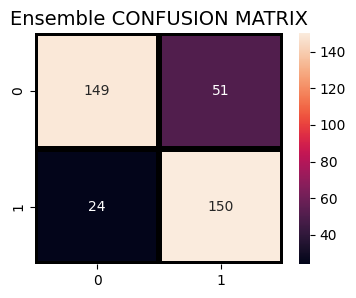

In [112]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Ensemble CONFUSION MATRIX",fontsize=14)
plt.show()